## Q1. What is Gradient Boosting Regression?

**Gradient Boosting Regression (GBR)** is a powerful machine learning technique used for predictive modeling and regression tasks. It is an ensemble method, which means it combines the predictions from multiple models to produce a final prediction that is generally more accurate than the predictions from individual models. GBR uses gradient descent optimization to minimize a loss function (such as Mean Squared Error for regression tasks). Each new model in the sequence is fitted to the residual errors (the gradient of the loss function) of the combined ensemble of previous models.

##### How Gradient Boosting Regression Works

1. **Initialization:**
    - The process starts by initializing the model with a simple prediction, often the mean value of the target variable.
    
    
2. **Iterative Process:**
    - For each iteration t:
        - Compute the residuals (errors) for the current model.
        - Fit a new model (usually a small decision tree) to these residuals.
        - Update the ensemble by adding this new model with a certain weight. The weight is determined by the learning rate, which controls how much influence each new model has on the final prediction.
        - The combined model is then updated to minimize the loss function.
        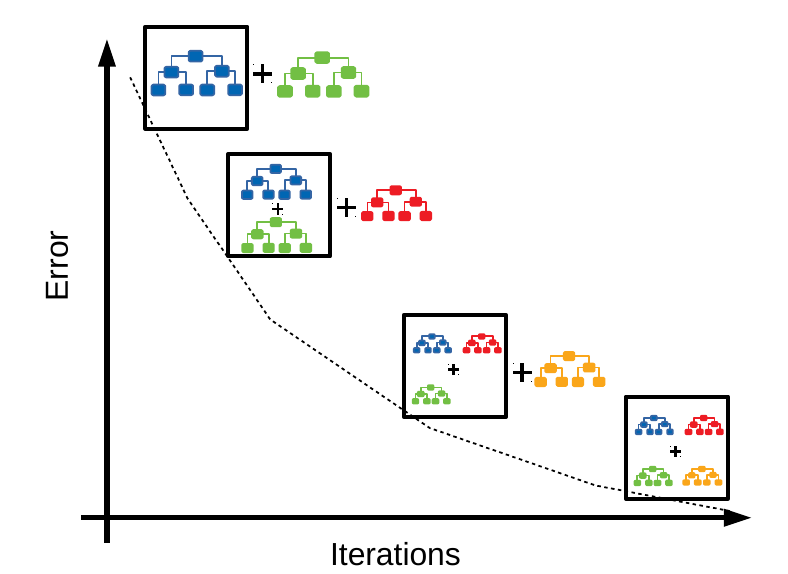

3. **Model Update:**
    - The prediction is updated by adding the new model's predictions, scaled by the learning rate:
    
    $$\hat{y_{i}}^{(t)} = \hat{y_{i}}^{(t - 1)} + \eta \cdot h_{t}(x_{i}) $$
    
    where $\hat{y_{i}}^{(t)}$ is the prediction for the $i-th$ instance at iteration $t$, $\eta$ is the learning rate and $h_{t}(x_{i})$ is the prediction of the $t-th$ model.
    
    
##### Advantages of Gradient Boosting Regression

1. **High Accuracy:** GBR can achieve high predictive accuracy by combining the strengths of multiple models and focusing on correcting errors.

2. **Flexibility:** It can be used with different loss functions, making it applicable to a variety of regression problems.

3. **Feature Importance:** GBR can provide insights into which features are most important in making predictions.

##### Disadvantages of Gradient Boosting Regression

1. **Computationally Intensive:** Training can be slow, especially for large datasets, because it involves building many models sequentially.

2. **Overfitting:** There is a risk of overfitting, particularly if the number of iterations (trees) is too large or the trees are too deep. Regularization techniques like limiting the depth of trees and adding a learning rate can help mitigate this.

3. **Complexity:** The resulting model can be quite complex and difficult to interpret compared to simpler models like linear regression.

##### Applications

GBR is widely used in various domains, including finance (for predicting stock prices), healthcare (for predicting patient outcomes), marketing (for customer lifetime value prediction), and many others where accurate predictive modeling is crucial.

## Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a simple regression problem as an example and train the model on a small dataset. Evaluate the model's performance using metrics such as mean squared error and R-squared.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Creating a data set
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=1, n_informative=1, random_state=42)

print(X.shape)
print(y.shape)

(1000, 1)
(1000,)


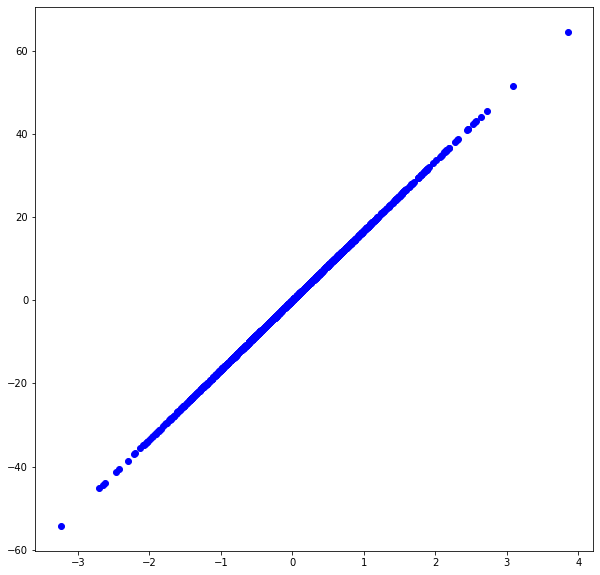

In [3]:
plt.figure(figsize=(10,10))
plt.scatter(X, y, color='blue')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"The training shape is:{X_train.shape},{y_train.shape}")
print(f"The test shape is:{X_test.shape},{y_test.shape}")

The training shape is:(800, 1),(800,)
The test shape is:(200, 1),(200,)


In [5]:
class GradientBoostingRegressorScratch:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=5):
        self.estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.losses = []
        
    def fit(self, X, y):
        self.y_mean = np.mean(y)
        y_pred = np.full(y.shape, self.y_mean)
        
        for i in range(self.estimators):
            # Calculate the residuals (negative gradient)
            residuals = y - y_pred
            
            # Fit a decision tree to the residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            
            # Predict the residuals
            update = tree.predict(X)
            
            # Update the predictions
            y_pred += self.learning_rate * update
            
            # Save the tree
            self.trees.append(tree)
            
            # Calculate and store the loss
            loss = mean_squared_error(y, y_pred)
            self.losses.append(loss)
            
    def predict(self, X):
        y_pred = np.full(X.shape[0], self.y_mean)
        for tree in self.trees:
            update = tree.predict(X)
            y_pred += self.learning_rate * update
        return y_pred

In [6]:
gbr_scratch = GradientBoostingRegressorScratch(n_estimators=100, learning_rate=0.01, max_depth=3)
gbr_scratch.fit(X_train, y_train)

In [7]:
# Predict on the test set
y_pred_train = gbr_scratch.predict(X_train)
y_pred_test = gbr_scratch.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training MSE: {mse_train:.4f}')
print(f'Training R-squared: {r2_train:.4f}')
print(f'Testing MSE: {mse_test:.4f}')
print(f'Testing R-squared: {r2_test:.4f}')

Training MSE: 40.0924
Training R-squared: 0.8525
Testing MSE: 36.4926
Testing R-squared: 0.8564


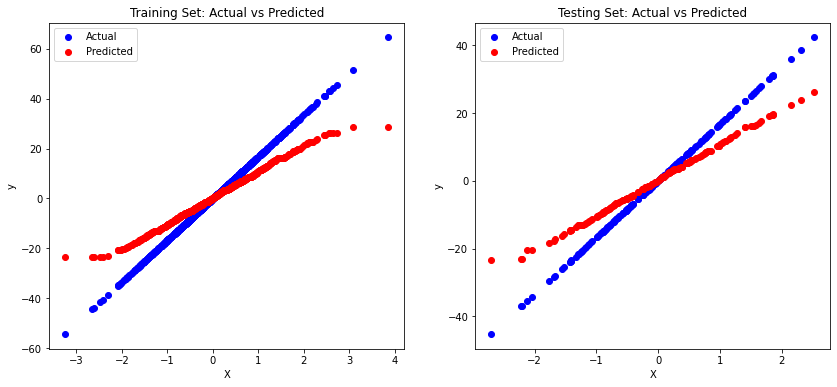

In [8]:
# Plotting the traing and testing actuals vs predictions
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.scatter(X_train, y_pred_train, color='red', label='Predicted')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Testing set
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_test, color='red', label='Predicted')
plt.title('Testing Set: Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.show()

## Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to optimise the performance of the model. Use grid search or random search to find the best hyperparameters

In [10]:
import itertools

class GradientBoostingRegressorScratch:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.losses = []
    
    def fit(self, X, y):
        self.y_mean = np.mean(y)
        y_pred = np.full(y.shape, self.y_mean)
        
        for i in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            update = tree.predict(X)
            y_pred += self.learning_rate * update
            self.trees.append(tree)
            loss = mean_squared_error(y, y_pred)
            self.losses.append(loss)
    
    def predict(self, X):
        y_pred = np.full(X.shape[0], self.y_mean)
        for tree in self.trees:
            update = tree.predict(X)
            y_pred += self.learning_rate * update
        return y_pred

    def grid_search(self, X_train, y_train, X_test, y_test, param_grid):
        best_params = None
        best_score = float('inf')
        all_params = list(itertools.product(*param_grid.values()))
        
        for params in all_params:
            self.__init__(n_estimators=params[0], learning_rate=params[1], max_depth=params[2])
            self.fit(X_train, y_train)
            y_pred = self.predict(X_test)
            score = mean_squared_error(y_test, y_pred)
            
            if score < best_score:
                best_score = score
                best_params = params
        
        self.__init__(n_estimators=best_params[0], learning_rate=best_params[1], max_depth=best_params[2])
        self.fit(X_train, y_train)
        
        return best_params, best_score


In [13]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 4]
}

# Create and train the model with grid search
gbr_scratch = GradientBoostingRegressorScratch()
best_params, best_score = gbr_scratch.grid_search(X_train, y_train, X_test, y_test, param_grid)

print(f'Best Parameters: {best_params}')
print(f'Best Test MSE: {best_score:.4f}')

Best Parameters: (200, 0.1, 4)
Best Test MSE: 0.0400


In [15]:
# Predict on the train and test sets using the best parameters
y_pred_train = gbr_scratch.predict(X_train)
y_pred_test = gbr_scratch.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)# Predict on the train and test sets using the best parameters
y_pred_train = gbr_scratch.predict(X_train)
y_pred_test = gbr_scratch.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training MSE: {mse_train:.4f}')
print(f'Training R-squared: {r2_train:.4f}')
print(f'Testing MSE: {mse_test:.4f}')
print(f'Testing R-squared: {r2_test:.4f}')

Training MSE: 0.0016
Training R-squared: 1.0000
Testing MSE: 0.0400
Testing R-squared: 0.9998


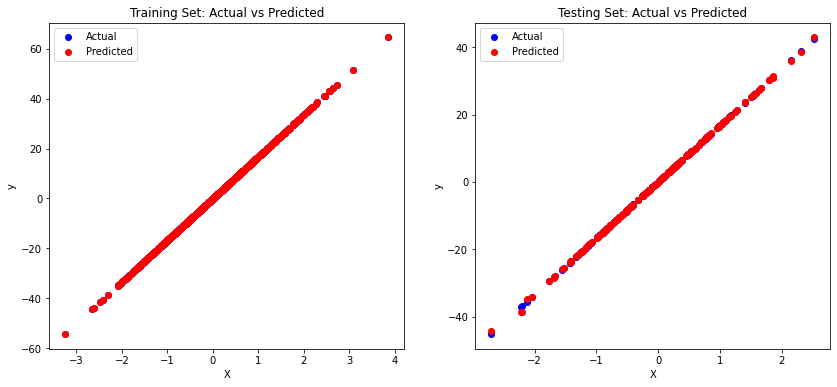

In [16]:
# Plot the actual vs predicted values
plt.figure(figsize=(14, 6))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.scatter(X_train, y_pred_train, color='red', label='Predicted')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Testing set
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_test, color='red', label='Predicted')
plt.title('Testing Set: Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.show()

## Q4. What is a weak learner in Gradient Boosting?

In the context of Gradient Boosting, a **weak learner (also known as a base learner)** is a simple model that performs slightly better than random guessing. Weak learners are characterized by their limited predictive power, which means they are not capable of making highly accurate predictions on their own. However, when combined through the boosting process, they can form a strong learner with significantly improved performance.

##### Key Characteristics of Weak Learners

1. **Simplicity:** Weak learners are typically simple models with low variance and high bias. Common examples include small decision trees (also known as decision stumps when they have a depth of one).


2. **Slightly Better than Random:** They perform only marginally better than random guessing on the training data. Despite their simplicity, they capture some patterns in the data.


3. **High Bias:** Due to their simplicity, weak learners tend to have high bias, meaning they might underfit the data. However, when combined in the boosting process, the overall bias can be reduced.

##### Example of Weak Learners in Gradient Boosting

- **Decision Stumps:** The most common weak learners used in Gradient Boosting are decision stumps, which are decision trees with a maximum depth of one. They make splits based on a single feature and have very limited predictive power.

## Q5. What is the intuition behind the Gradient Boosting algorithm?

The intuition behind the Gradient Boosting algorithm is to build a strong predictive model by combining many weak learners, usually simple models like decision stumps. The process iteratively improves the model by focusing on the errors (residuals) made by previous models.

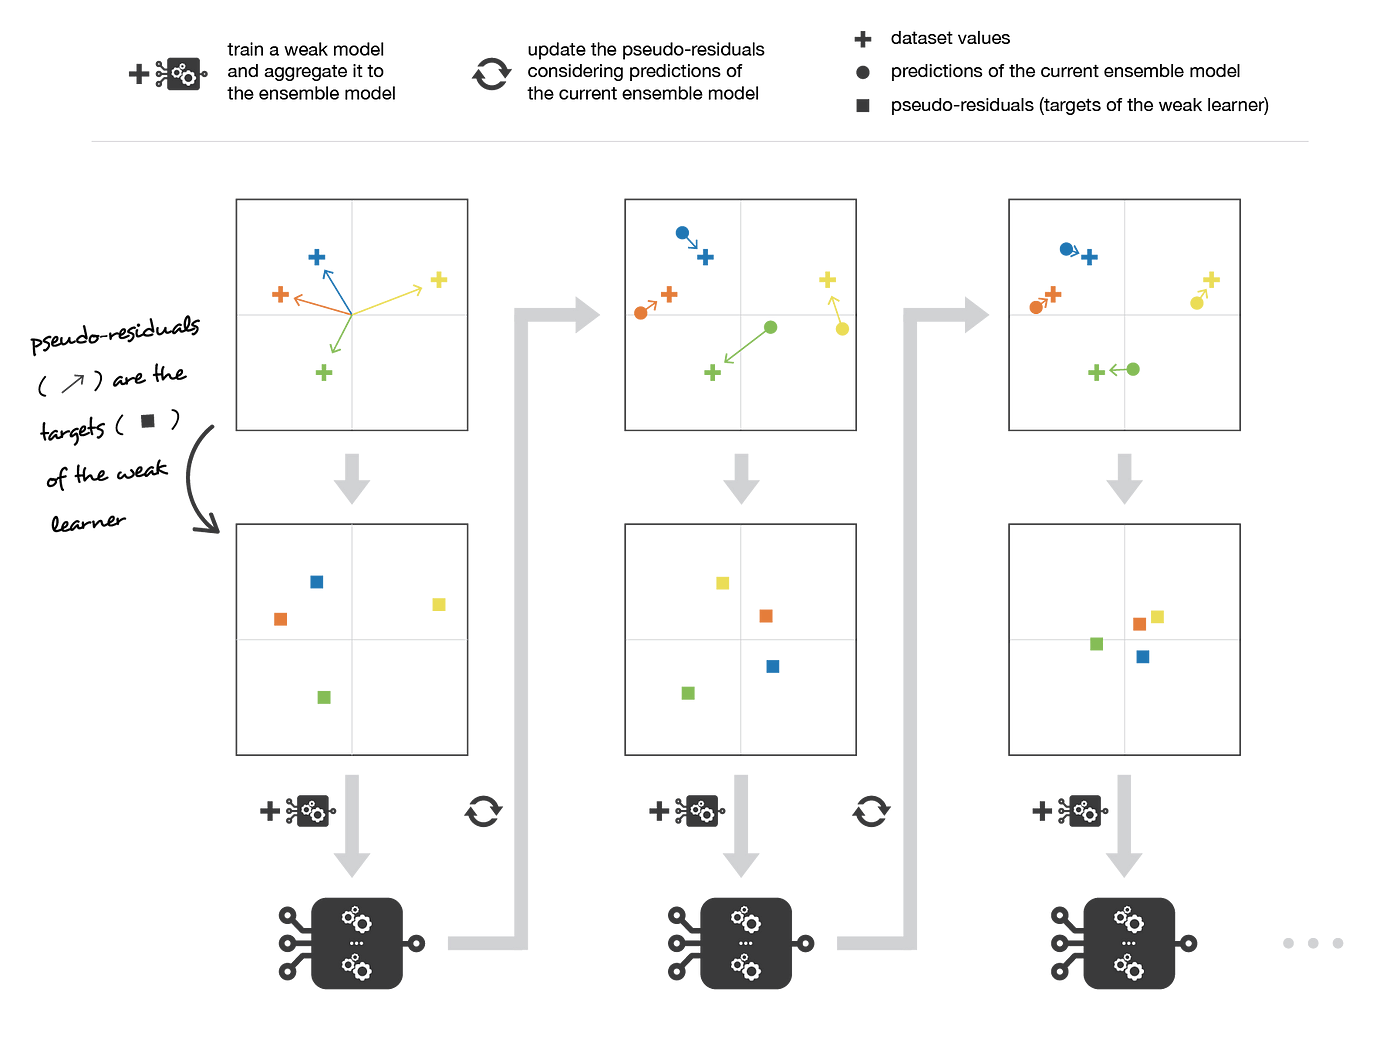

## Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?

The Gradient Boosting algorithm builds an ensemble of weak learners in a sequential and iterative manner. At each iteration, the algorithm trains a new weak learner that can improve the accuracy of the current ensemble, and then adds it to the ensemble in a weighted manner.

The general steps of the Gradient Boosting algorithm are:

1. Initialize the ensemble by fitting a single weak learner (e.g., a decision tree) to the data and making a prediction based on the input features.

2. Compute the difference between the predicted values and the true target values, which is called the residual.

3. Train a new weak learner to predict the residual (i.e., the difference between the predicted and true values) instead of the original target variable. This new learner is fit to the negative gradient of the loss function with respect to the current predictions of the ensemble, which gives it a clear direction for improving the predictions.

4. Add the new weak learner to the ensemble by combining it with the previous learners in a weighted manner. The weights of the previous learners are adjusted to give more weight to the models that made larger contributions to the prediction.

5. Repeat steps 2-4 until a stopping criterion is met (e.g., a maximum number of iterations, a minimum improvement in accuracy, or the presence of overfitting).

By iteratively adding new weak learners to the ensemble and adjusting the weights of the previous learners, the Gradient Boosting algorithm can create a highly accurate and robust prediction model. The ensemble of weak learners can capture complex nonlinear relationships between the input features and the target variable, while the iterative learning process can gradually refine the predictions and reduce the residual error.
Overall, the Gradient Boosting algorithm is an effective way to build an ensemble of weak learners and create a strong prediction model that can generalize well to new data.

## Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting algorithm?

Gradient Boosting is a popular machine learning algorithm used for both regression and classification tasks. Here are the steps involved in constructing the mathematical intuition of Gradient Boosting:
Define the problem: Define the problem you want to solve using Gradient Boosting, whether it's a regression or classification task.

1. **Define the loss function:** The loss function is a measure of how well the algorithm is doing in fitting the training data. In Gradient Boosting, we typically use a differentiable loss function such as mean squared error for regression or log loss for classification.

2. **Create an initial model:** Create an initial model to make predictions. This model can be as simple as the mean of the target variable or a linear regression model.

3. **Calculate the residual errors:** Calculate the residual errors by subtracting the predictions of the initial model from the actual values of the target variable.

4. **Train a new model on the residual errors:** Train a new model on the residual errors from the previous step. This model is usually a decision tree with a fixed depth.

5. **Add the predictions of the new model to the previous predictions:** Add the predictions of the new model to the previous predictions to update the model. This process is called boosting because we are boosting the performance of the model by adding new models to it.

6. **Repeat steps 4 to 6 until convergence:** Repeat steps 4 to 6 until the model converges or until a stopping criterion is met. The stopping criterion can be a maximum number of models, a threshold for the improvement of the loss function, or a maximum depth for the decision trees.

7. **Make predictions:** Use the final model to make predictions on new data.

Overall, Gradient Boosting works by iteratively improving the model by adding new models to correct the errors of the previous models. This process continues until the model converges or a stopping criterion is met.